In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams['figure.dpi'] = 100.0

import sys
sys.path.insert(0, '/global/common/cori/contrib/lsst/apps/anaconda/py2-envs/DESCQA/lib/python2.7/site-packages')

In [2]:
import GCRCatalogs

In [3]:
gc_alphaq = GCRCatalogs.load_catalog('proto-dc2-v1.0')
gc_buzzard = GCRCatalogs.load_catalog('buzzard_v1.6')

#for testing purpose, use only one pixel for buzzard
gc_buzzard.healpix_pixels = gc_buzzard.healpix_pixels[:1]

gc = dict(AlphaQ=gc_alphaq, Buzzard=gc_buzzard)

/global/common/cori/contrib/lsst/apps/anaconda/py2-envs/DESCQA/lib/python2.7/site-packages/GCR.py:263: UserWarning: Native quantity `m0` does not exist (required by `magnification`)
  warnings.warn(msg)


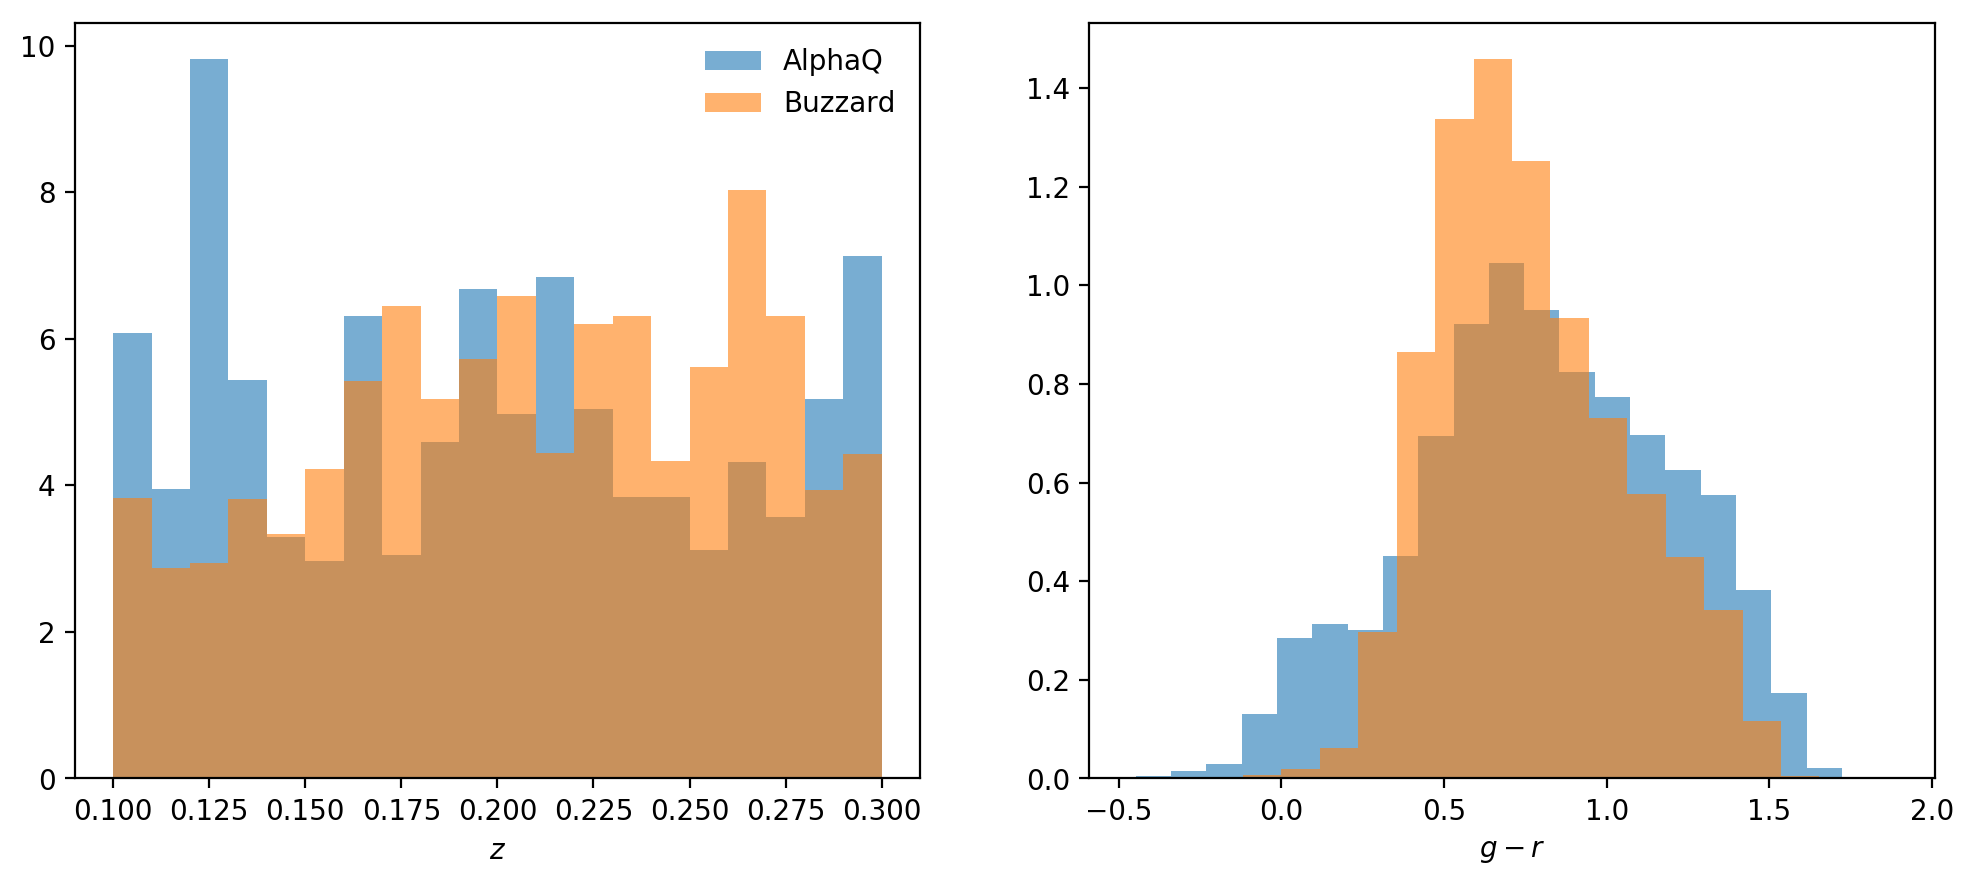

In [4]:
fig, ax = plt.subplots(ncols=2, figsize=(12,5))
for label, gc_this in gc.items():
    data = gc_this.get_quantities(['redshift_true', 'mag_g_any', 'mag_r_any'], 
                                  filters=[(lambda z: (z > 0.1) & (z < 0.3), 'redshift_true')], 
                                  return_ndarray=True)
    data = data[np.isfinite(data['mag_g_any']) & np.isfinite(data['mag_r_any'])]
    data = data[data['mag_r_any'] < 22.0]
    ax[0].hist(data['redshift_true'], 20, normed=True, alpha=0.6, label=label);
    ax[1].hist(data['mag_g_any'] - data['mag_r_any'], 20, normed=True, alpha=0.6);

ax[0].legend(frameon=False);
ax[0].set_xlabel('$z$');
ax[1].set_xlabel('$g-r$');

In [4]:
gc['Buzzard'].get_input_kwargs()

{'catalog_path_template': {'truth': 'truth_v1.6/Chinchilla-0_lensed.{}.fits'},
 'catalog_root_dir': '/global/project/projectdirs/lsst/jderose/BCC/Chinchilla/Herd/Chinchilla-0/addgalspostprocess',
 'cosmology': {'H0': 70.0, 'Om0': 0.286},
 'creators': ['Joe DeRose', 'Risa Wechsler', 'Eli Rykoff', 'Matt Becker'],
 'halo_mass_def': 'vir',
 'lightcone': True,
 'subclass_name': 'BuzzardGalaxyCatalog'}

In [5]:
sorted(gc['Buzzard'].list_all_quantities())

['Mag_true_Y_any',
 'Mag_true_Y_des_z01',
 'Mag_true_g_any',
 'Mag_true_g_des_z01',
 'Mag_true_i_any',
 'Mag_true_i_des_z01',
 'Mag_true_r_any',
 'Mag_true_r_des_z01',
 'Mag_true_z_any',
 'Mag_true_z_des_z01',
 'convergence',
 'dec',
 'dec_true',
 'ellipticity_1',
 'ellipticity_1_true',
 'ellipticity_2',
 'ellipticity_2_true',
 'galaxy_id',
 'halo_id',
 'halo_mass',
 'is_central',
 'mag_Y_any',
 'mag_Y_des',
 'mag_g_any',
 'mag_g_des',
 'mag_i_any',
 'mag_i_des',
 'mag_r_any',
 'mag_r_des',
 'mag_z_any',
 'mag_z_des',
 'magerr_Y_any',
 'magerr_Y_des',
 'magerr_g_any',
 'magerr_g_des',
 'magerr_i_any',
 'magerr_i_des',
 'magerr_r_any',
 'magerr_r_des',
 'magerr_z_any',
 'magerr_z_des',
 'magnification',
 'position_x',
 'position_y',
 'position_z',
 'ra',
 'ra_true',
 'redshift',
 'redshift_true',
 'shear_1',
 'shear_2',
 'size',
 'size_true',
 'velocity_x',
 'velocity_y',
 'velocity_z']

In [6]:
sorted(gc['Buzzard'].list_all_native_quantities())

['healpix_pixel',
 'truth/AMAG/0',
 'truth/AMAG/1',
 'truth/AMAG/2',
 'truth/AMAG/3',
 'truth/AMAG/4',
 'truth/CENTRAL',
 'truth/COEFFS/0',
 'truth/COEFFS/1',
 'truth/COEFFS/2',
 'truth/COEFFS/3',
 'truth/COEFFS/4',
 'truth/DEC',
 'truth/DELTAM',
 'truth/DIST8',
 'truth/ECATID',
 'truth/EPSILON/0',
 'truth/EPSILON/1',
 'truth/FLUX/0',
 'truth/FLUX/1',
 'truth/FLUX/2',
 'truth/FLUX/3',
 'truth/FLUX/4',
 'truth/GAMMA1',
 'truth/GAMMA2',
 'truth/HALOID',
 'truth/ID',
 'truth/INDEX',
 'truth/IVAR/0',
 'truth/IVAR/1',
 'truth/IVAR/2',
 'truth/IVAR/3',
 'truth/IVAR/4',
 'truth/KAPPA',
 'truth/LMAG/0',
 'truth/LMAG/1',
 'truth/LMAG/2',
 'truth/LMAG/3',
 'truth/LMAG/4',
 'truth/M200',
 'truth/MAG_R',
 'truth/MU',
 'truth/NGALS',
 'truth/OMAG/0',
 'truth/OMAG/1',
 'truth/OMAG/2',
 'truth/OMAG/3',
 'truth/OMAG/4',
 'truth/OMAGERR/0',
 'truth/OMAGERR/1',
 'truth/OMAGERR/2',
 'truth/OMAGERR/3',
 'truth/OMAGERR/4',
 'truth/PDIST8',
 'truth/PX',
 'truth/PY',
 'truth/PZ',
 'truth/R200',
 'truth/RA',
